# N-Body Problem Simulation

## Introduction
The N-body problem is a classical problem in physics that predicts the individual motions of a group of celestial objects interacting with each other gravitationally. Solving this problem has been a key element in understanding the motion of planets, stars, galaxies, and other celestial bodies.

In this notebook, we will simulate the N-body problem to model the motion of the celestial bodies in the Solar System, including the Sun, the eight planets, and their moons. We will use Python classes to represent celestial bodies and the system they belong to. The goal is to visualize the trajectories of these bodies over time under the influence of their mutual gravitational interactions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11

## Objects defined in Nbody.py

### CelestialBody Class
Has properties like mass, position, velocity, and force, and a method to update its position and velocity based on net force acting on it.

### System Class
System of celestial bodies. Has methods to add bodies, compute the interacting forces, and updating their attributes.

In [2]:
from Nbody import CelestialBody, System

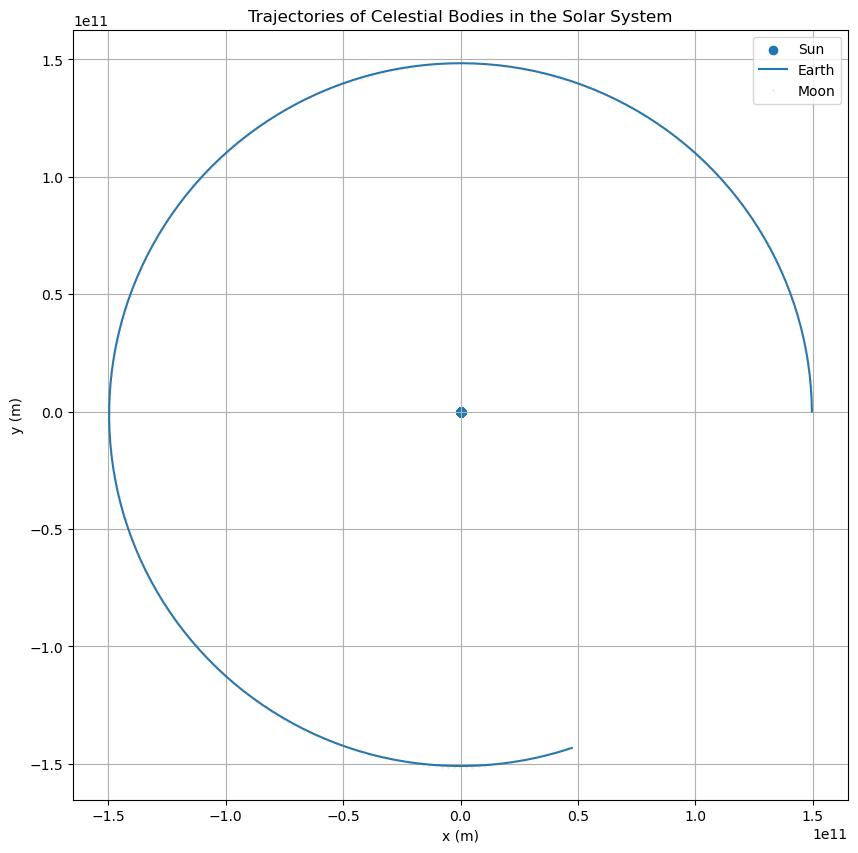

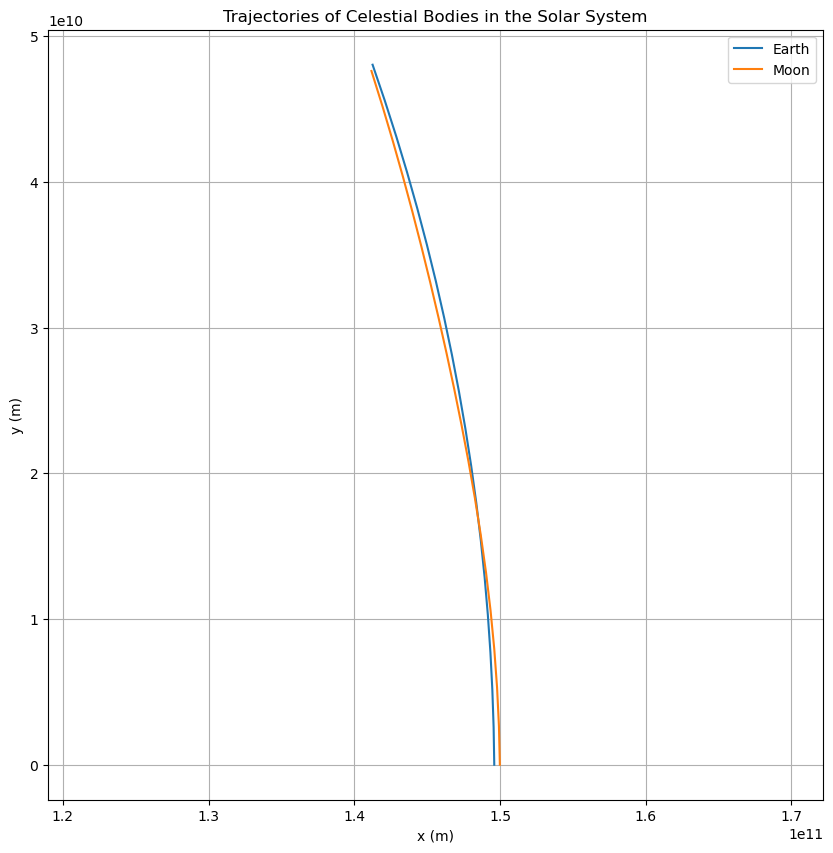

In [3]:
solar_system = System()

# mass in kg, position in m, velocity in m/s

# star
mass_sun = 1.989e30  
position_sun = [0, 0, 0] 
velocity_sun = [0, 0, 0]
sun = CelestialBody(mass_sun, position_sun, velocity_sun)
solar_system.add_body(sun)

# planet
mass_earth = 5.972e24  
position_earth = [1.496e11, 0, 0] 
velocity_earth = [0, 29.78e3, 0] 
earth = CelestialBody(mass_earth, position_earth, velocity_earth)
solar_system.add_body(earth)

# moon
mass_moon = 7.34767309e22
position_moon = [1.496e11 + 384.4e6, 0, 0]
velocity_moon = [0, 29.78e3 + 1.022e3, 0]
moon = CelestialBody(mass_moon, position_moon, velocity_moon)
solar_system.add_body(moon)

dt = 60 * 60 * 24  # 1 day in seconds
num_steps = int(365 * 0.8)  # 0.8 years

# initial positions
positions_sun = [np.copy(sun.position)]
positions_earth = [np.copy(earth.position)]
positions_moon = [np.copy(moon.position)]

for step in range(num_steps):
    # compute_interations, update, and reset_forces are defined in Nbody.py
    solar_system.compute_interactions()  
    solar_system.update(dt)  
    solar_system.reset_forces() 

    positions_sun.append(np.copy(sun.position))
    positions_earth.append(np.copy(earth.position))
    positions_moon.append(np.copy(moon.position))

positions_sun = np.array(positions_sun)
positions_earth = np.array(positions_earth)
positions_moon = np.array(positions_moon)

plt.figure(figsize=(10, 10))
plt.scatter(positions_sun[:, 0], positions_sun[:, 1], label='Sun')
plt.plot(positions_earth[:, 0], positions_earth[:, 1], label='Earth')
plt.plot(positions_moon[:, 0], positions_moon[:, 1], '.', markersize=0.3, label='Moon')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.title('Trajectories of Celestial Bodies in the Solar System')
plt.grid(True)
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(positions_earth[:20, 0], positions_earth[:20, 1], label='Earth')
plt.plot(positions_moon[:20, 0], positions_moon[:20, 1], label='Moon')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.title('Trajectories of Celestial Bodies in the Solar System')
plt.grid(True)
plt.axis('equal')
plt.show()


## Hypothetical Systems

Now that we have verified that our classes are working correctly with the Sun, Earth, and Moon, let's proceed to initialize some random systems.

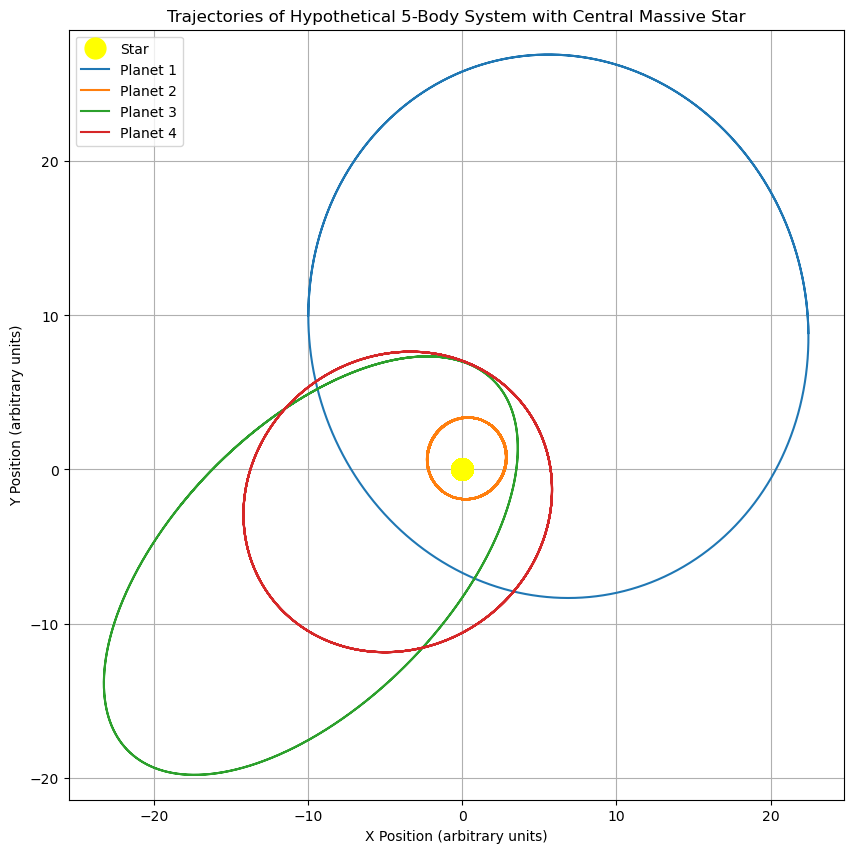

In [8]:
hypothetical_system = System()

dt = 60 * 60 * 24  
num_steps = 365 * 10   


mass_star = 1.989e12  
position_star = [0, 0, 0]   
velocity_star = [0, 0, 0]  
star = CelestialBody(mass_star, position_star, velocity_star)
hypothetical_system.add_body(star)

mass_planet = 1000.0   

position_planet1 = [-10, 10, 0]  
velocity_planet1 = [0, 3, 2]   
planet1 = CelestialBody(mass_planet*2, position_planet1, velocity_planet1)
hypothetical_system.add_body(planet1)

position_planet2 = [-1, 3, 0]  
velocity_planet2 = [-5, -3, 0]   
planet2 = CelestialBody(mass_planet//2, position_planet2, velocity_planet2)
hypothetical_system.add_body(planet2)

position_planet3 = [0, 7, 4]   
velocity_planet3 = [-3, 1, 4]   
planet3 = CelestialBody(mass_planet*3, position_planet3, velocity_planet3)
hypothetical_system.add_body(planet3)

position_planet4 = [1, -10, 0]   
velocity_planet4 = [3, 2, 1]  
planet4 = CelestialBody(mass_planet, position_planet4, velocity_planet4)
hypothetical_system.add_body(planet4)

positions_star = [np.copy(star.position)]
positions_planet1 = [np.copy(planet1.position)]
positions_planet2 = [np.copy(planet2.position)]
positions_planet3 = [np.copy(planet3.position)]
positions_planet4 = [np.copy(planet4.position)]

dt = 0.01   
num_steps = 10000   

for step in range(num_steps):
    hypothetical_system.compute_interactions()  
    hypothetical_system.update(dt)  
    hypothetical_system.reset_forces()  

    positions_star.append(np.copy(star.position))
    positions_planet1.append(np.copy(planet1.position))
    positions_planet2.append(np.copy(planet2.position))
    positions_planet3.append(np.copy(planet3.position))
    positions_planet4.append(np.copy(planet4.position))

positions_star = np.array(positions_star)
positions_planet1 = np.array(positions_planet1)
positions_planet2 = np.array(positions_planet2)
positions_planet3 = np.array(positions_planet3)
positions_planet4 = np.array(positions_planet4)

plt.figure(figsize=(10, 10))
plt.plot(positions_star[:, 0], positions_star[:, 1], '.', label='Star', c='yellow', markersize=30)
plt.plot(positions_planet1[:, 0], positions_planet1[:, 1], label='Planet 1')
plt.plot(positions_planet2[:, 0], positions_planet2[:, 1], label='Planet 2')
plt.plot(positions_planet3[:, 0], positions_planet3[:, 1], label='Planet 3')
plt.plot(positions_planet4[:, 0], positions_planet4[:, 1], label='Planet 4')
plt.xlabel('X Position (arbitrary units)')
plt.ylabel('Y Position (arbitrary units)')
plt.legend()
plt.title('Trajectories of Hypothetical 5-Body System with Central Massive Star')
plt.grid(True)
plt.axis('equal')
plt.show()

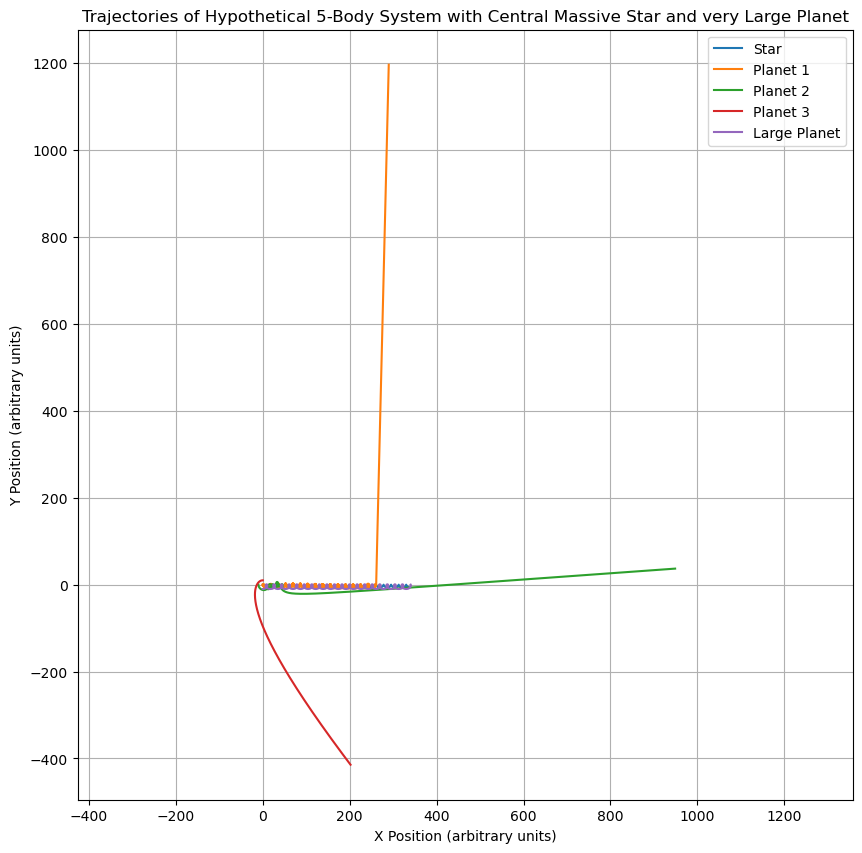

In [9]:
central_massive_body_system = System()

# Star
mass_star = 1e12
position_star = [0, 0, 0]
velocity_star = [0, 0, 0]
star = CelestialBody(mass_star, position_star, velocity_star)
central_massive_body_system.add_body(star)

mass_planet1 = 10000.0
position_planet1 = [3, 0, 0]
velocity_planet1 = [0, 3, 0]
planet1 = CelestialBody(mass_planet1, position_planet1, velocity_planet1)
central_massive_body_system.add_body(planet1)

mass_planet2 = 3000000.0
position_planet2 = [-10, 0, 0]
velocity_planet2 = [0, -3, 0]
planet2 = CelestialBody(mass_planet2, position_planet2, velocity_planet2)
central_massive_body_system.add_body(planet2)

mass_planet3 = 4000.0
position_planet3 = [0, 10, 0]
velocity_planet3 = [-3, 0, 0]
planet3 = CelestialBody(mass_planet3, position_planet3, velocity_planet3)
central_massive_body_system.add_body(planet3)

# Large planet
mass_planet4 = 600000000000.0
position_planet4 = [0, -10, 0]
velocity_planet4 = [3, 0, 0]
planet4 = CelestialBody(mass_planet4, position_planet4, velocity_planet4)
central_massive_body_system.add_body(planet4)

dt_central_massive_body = 0.01 
num_steps = 30000 

positions_star = [np.copy(star.position)]
positions_planet1 = [np.copy(planet1.position)]
positions_planet2 = [np.copy(planet2.position)]
positions_planet3 = [np.copy(planet3.position)]
positions_planet4 = [np.copy(planet4.position)]

for step in range(num_steps):
    central_massive_body_system.compute_interactions() 
    central_massive_body_system.update(dt_central_massive_body)
    central_massive_body_system.reset_forces()

    positions_star.append(np.copy(star.position))
    positions_planet1.append(np.copy(planet1.position))
    positions_planet2.append(np.copy(planet2.position))
    positions_planet3.append(np.copy(planet3.position))
    positions_planet4.append(np.copy(planet4.position))

positions_star = np.array(positions_star)
positions_planet1 = np.array(positions_planet1)
positions_planet2 = np.array(positions_planet2)
positions_planet3 = np.array(positions_planet3)
positions_planet4 = np.array(positions_planet4)

plt.figure(figsize=(10, 10))
plt.plot(positions_star[:, 0], positions_star[:, 1], label='Star')
plt.plot(positions_planet1[:, 0], positions_planet1[:, 1], label='Planet 1')
plt.plot(positions_planet2[:, 0], positions_planet2[:, 1], label='Planet 2')
plt.plot(positions_planet3[:, 0], positions_planet3[:, 1], label='Planet 3')
plt.plot(positions_planet4[:, 0], positions_planet4[:, 1], label='Large Planet')
plt.xlabel('X Position (arbitrary units)')
plt.ylabel('Y Position (arbitrary units)')
plt.legend()
plt.title('Trajectories of Hypothetical 5-Body System with Central Massive Star and very Large Planet')
plt.grid(True)
plt.axis('equal')
plt.show()

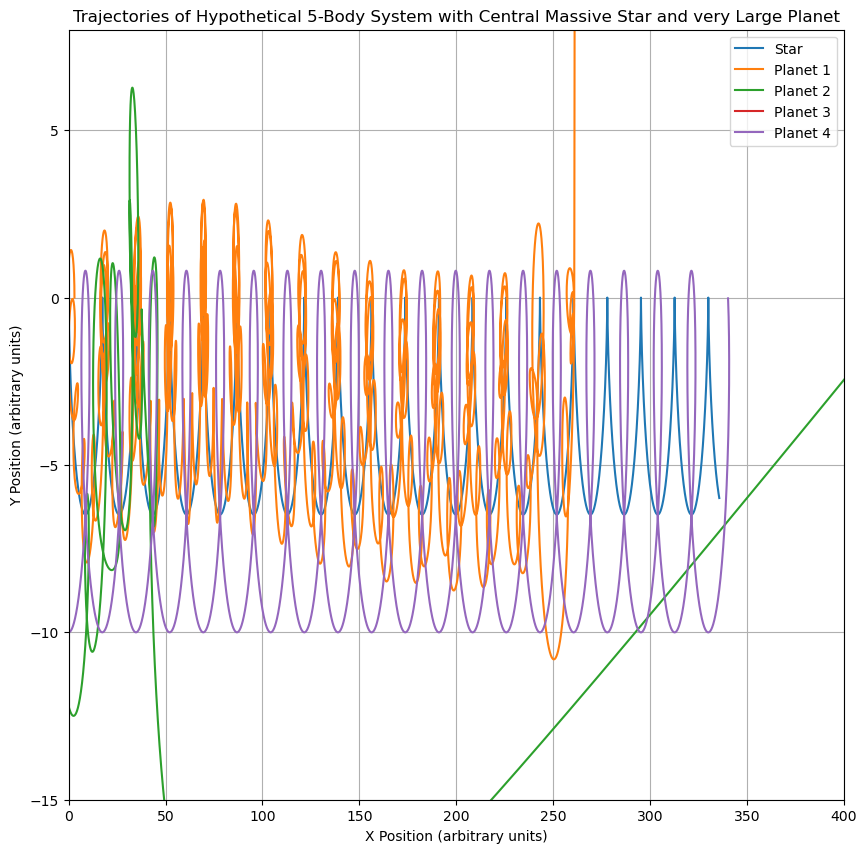

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(positions_star[:, 0], positions_star[:, 1], label='Star')
plt.plot(positions_planet1[:, 0], positions_planet1[:, 1], label='Planet 1')
plt.plot(positions_planet2[:, 0], positions_planet2[:, 1], label='Planet 2')
plt.plot(positions_planet3[:, 0], positions_planet3[:, 1], label='Planet 3')
plt.plot(positions_planet4[:, 0], positions_planet4[:, 1], label='Planet 4')
plt.ylim(-15,8)
plt.xlim(0,400)
plt.xlabel('X Position (arbitrary units)')
plt.ylabel('Y Position (arbitrary units)')
plt.legend()
plt.title('Trajectories of Hypothetical 5-Body System with Central Massive Star and very Large Planet')
plt.grid(True)
plt.show()

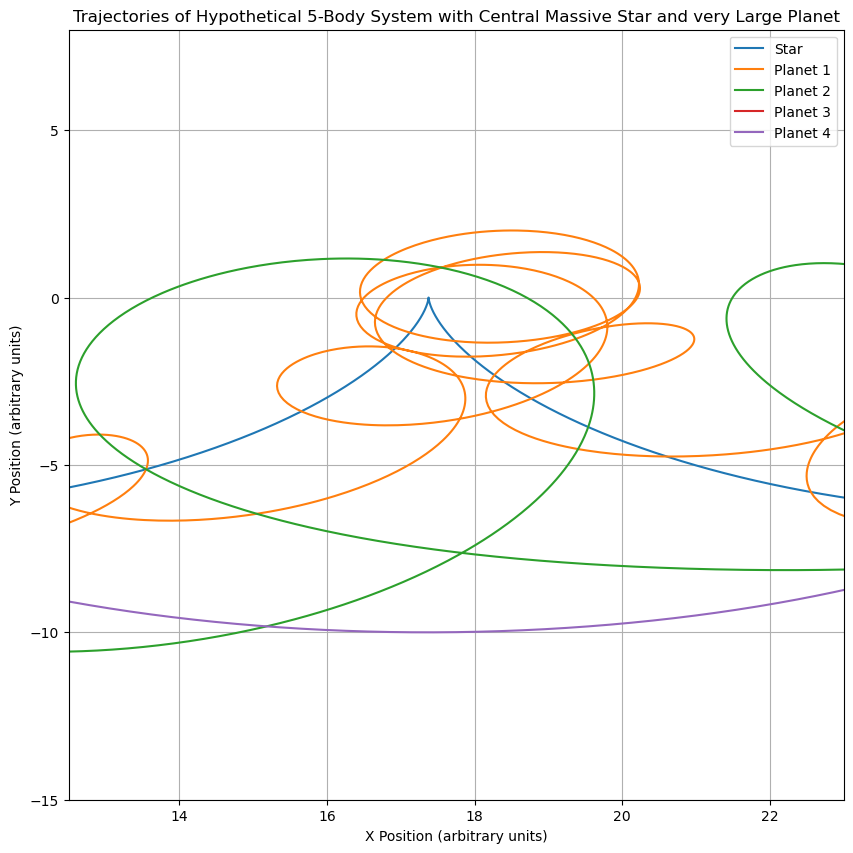

In [11]:
plt.figure(figsize=(10, 10))
plt.plot(positions_star[:, 0], positions_star[:, 1], label='Star')
plt.plot(positions_planet1[:, 0], positions_planet1[:, 1], label='Planet 1')
plt.plot(positions_planet2[:, 0], positions_planet2[:, 1], label='Planet 2')
plt.plot(positions_planet3[:, 0], positions_planet3[:, 1], label='Planet 3')
plt.plot(positions_planet4[:, 0], positions_planet4[:, 1], label='Planet 4')
plt.ylim(-15,8)
plt.xlim(12.5,23)
plt.xlabel('X Position (arbitrary units)')
plt.ylabel('Y Position (arbitrary units)')
plt.legend()
plt.title('Trajectories of Hypothetical 5-Body System with Central Massive Star and very Large Planet')
plt.grid(True)
plt.show()